# Ridge/LASSO polynomial regression with linear and random sampling
* Input variable space is constructed using random sampling/cluster pick/uniform sampling
* Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
* Ridge and LASSO regression are used with varying model complexity (degree of polynomial)
* Model score is obtained on a test set and average score over a # of runs is compared for linear and random sampling

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Global variables for the program

In [2]:
N_points = 41 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 2 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-3,0,1) ]) # Alpha (regularization strength) of ridge regression
lasso_eps = 0.001
lasso_nalpha=20
lasso_iter=1000
degree_min = 2
degree_max = 8

### Generate feature and output vector following a non-linear function
$$ The\ ground\ truth\ or\ originating\ function\ is\ as\ follows:\  $$

$$ y=f(x)= x^2sin(x)e^{-0.1x}+\psi(x),$$
$$ where $$
$$ \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}} $$

In [3]:
x_smooth = np.array(np.linspace(x_min,x_max,1001))

In [4]:
# Linearly spaced sample points
X=np.array(np.linspace(x_min,x_max,N_points))

# Samples drawn from uniform random distribution
X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)

In [5]:
def func(x):
    result = x**2*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

In [6]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [7]:
y = func(X)+noise_x
y_sampled = func(X_sample)+noise_x

In [8]:
df = pd.DataFrame(data=X,columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=X_sample
df['y_sampled']=y_sampled
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.000,0.761394,-1.795247,2.718296,-0.243851
1,1.225,1.249025,2.876290,5.003416,-12.913268
2,1.450,1.805456,2.072906,6.322445,1.101170
3,1.675,2.360061,1.716227,9.924709,-18.145427
4,1.900,2.825011,2.642852,1.066640,0.713224


### Plot the function(s), both the ideal characteristic and the observed output (with process and observation noise)

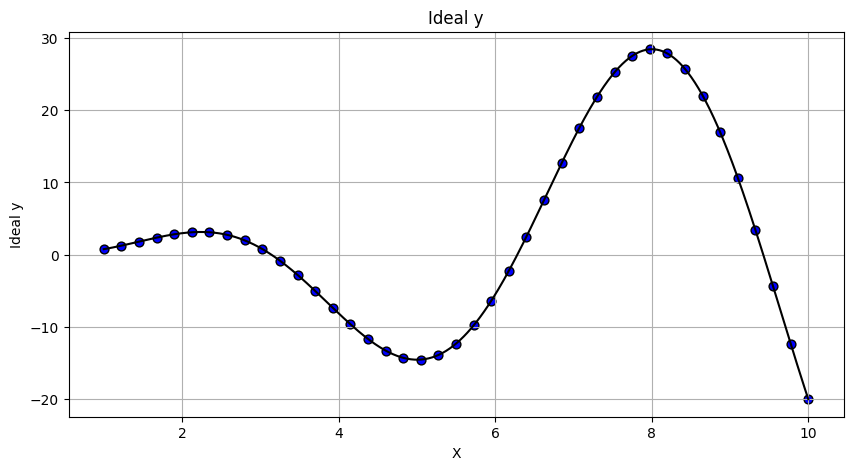

In [9]:
df.plot.scatter('X','Ideal y',title='Ideal y',grid=True,edgecolors=(0,0,0),c='blue',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

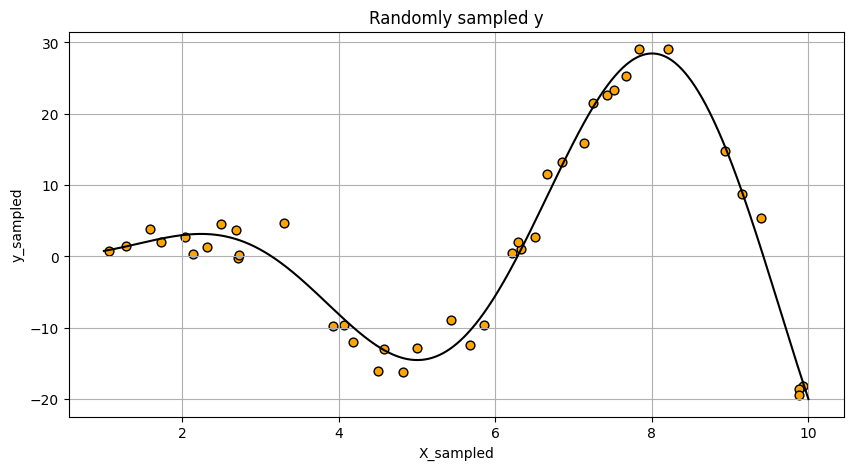

In [10]:
df.plot.scatter('X_sampled',y='y_sampled',title='Randomly sampled y',
                grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

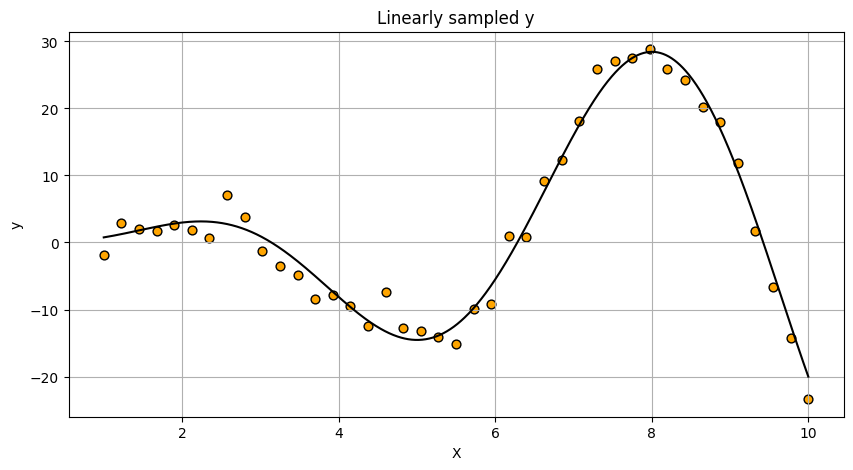

In [11]:
df.plot.scatter('X',y='y',title='Linearly sampled y',grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

### Import scikit-learn librares and prepare train/test splits

In [12]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

### Polynomial model with Ridge regularization (pipelined) with lineary spaced samples
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

In [14]:
linear_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,cv=5))
    model.fit(X_train, y_train)


/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.00791e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96746e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.98251e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond

In [15]:
linear_sample_score

[]

### Modeling with randomly sampled data set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['X_sampled'], df['y_sampled'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [17]:
random_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,cv=5))
    model.fit(X_train, y_train)

/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.21789e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.06409e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.46474e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/qimengshi/Documents/GitHub/AI_course_assignment/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond

In [18]:
random_sample_score

[]

In [19]:
df_score = pd.DataFrame(data={'degree':poly_degree,
                              'Linear sample score':linear_sample_score,
                              'Random sample score':random_sample_score})
df_score

,degree,Linear sample score,Random sample score


/var/folders/sc/s6l29h_j7xx02f95pxl5ply40000gn/T/ipykernel_24716/14997738.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=15)


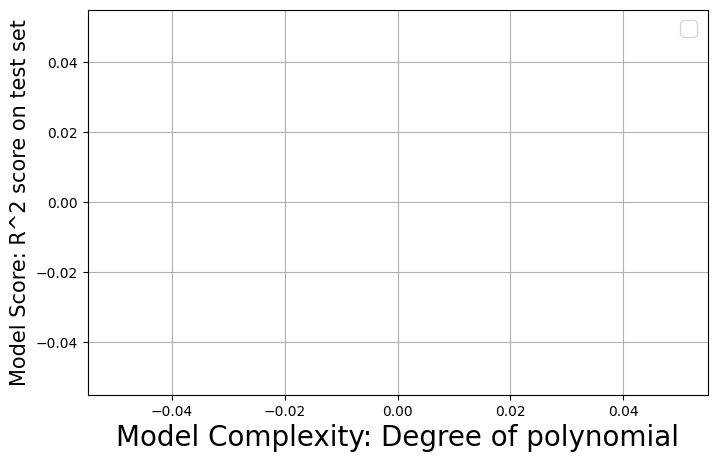

In [20]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(df_score['degree'],df_score['Linear sample score'],lw=2)
plt.plot(df_score['degree'],df_score['Random sample score'],lw=2)
plt.xlabel ("Model Complexity: Degree of polynomial",fontsize=20)
plt.ylabel ("Model Score: R^2 score on test set",fontsize=15)
plt.legend(fontsize=15)